In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder
import warnings
warnings.filterwarnings('ignore')
1

1

In [2]:
m1 = pd.read_csv("C:/Users/Tejal/Desktop/AS/AS-9 - Association rule/my_movies.csv")

In [3]:
m1

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
5,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
6,Harry Potter1,Harry Potter2,NaN,NaN,NaN,0,0,0,1,0,0,1,0,0,0
7,Gladiator,Patriot,NaN,NaN,NaN,0,1,0,0,1,0,0,0,0,0
8,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
9,Sixth Sense,LOTR,Gladiator,Green Mile,NaN,1,1,0,0,0,0,0,1,0,1


In [5]:
m2 = m1.drop(['V1','V2','V3','V4','V5'],axis = 1)

In [ ]:
###Apriori Algorithm


In [ ]:
# Association rule with 20% support and 70% confidance

In [8]:
ap = apriori(m2,min_support=0.2,use_colnames = True)
ap

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
5,0.2,(LOTR2)
6,0.2,(Green Mile)
7,0.5,"(Gladiator, Sixth Sense)"
8,0.4,"(Patriot, Sixth Sense)"
9,0.2,"(Green Mile, Sixth Sense)"


In [13]:
rule1 = association_rules(ap, metric="lift",min_threshold = 0.7)
rule1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4,0.533333
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8,0.400000
2,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.250000
3,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.250000
4,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf,0.500000
5,(Sixth Sense),(Green Mile),0.6,0.2,0.2,0.333333,1.666667,0.08,1.2,1.000000
6,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8,1.000000
7,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf,0.750000
8,(LOTR1),(LOTR2),0.2,0.2,0.2,1.000000,5.000000,0.16,inf,1.000000
9,(LOTR2),(LOTR1),0.2,0.2,0.2,1.000000,5.000000,0.16,inf,1.000000


In [19]:
rule1.sort_values('lift',ascending = False)[0:20]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
8,(LOTR1),(LOTR2),0.2,0.2,0.2,1.000000,5.000000,0.16,inf,1.000000
9,(LOTR2),(LOTR1),0.2,0.2,0.2,1.000000,5.000000,0.16,inf,1.000000
4,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf,0.500000
5,(Sixth Sense),(Green Mile),0.6,0.2,0.2,0.333333,1.666667,0.08,1.2,1.000000
6,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8,1.000000
7,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf,0.750000
12,"(Patriot, Sixth Sense)",(Gladiator),0.4,0.7,0.4,1.000000,1.428571,0.12,inf,0.500000
13,(Gladiator),"(Patriot, Sixth Sense)",0.7,0.4,0.4,0.571429,1.428571,0.12,1.4,1.000000
11,"(Gladiator, Sixth Sense)",(Patriot),0.5,0.6,0.4,0.800000,1.333333,0.10,2.0,0.500000
14,(Patriot),"(Gladiator, Sixth Sense)",0.6,0.5,0.4,0.666667,1.333333,0.10,1.5,0.625000


In [20]:
rule1[rule1.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4,0.533333
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8,0.400000
2,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.250000
3,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.250000
4,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf,0.500000
5,(Sixth Sense),(Green Mile),0.6,0.2,0.2,0.333333,1.666667,0.08,1.2,1.000000
6,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8,1.000000
7,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf,0.750000
8,(LOTR1),(LOTR2),0.2,0.2,0.2,1.000000,5.000000,0.16,inf,1.000000
9,(LOTR2),(LOTR1),0.2,0.2,0.2,1.000000,5.000000,0.16,inf,1.000000


array([[<Axes: title={'center': 'support'}>,
        <Axes: title={'center': 'confidence'}>],
       [<Axes: title={'center': 'lift'}>, <Axes: >]], dtype=object)

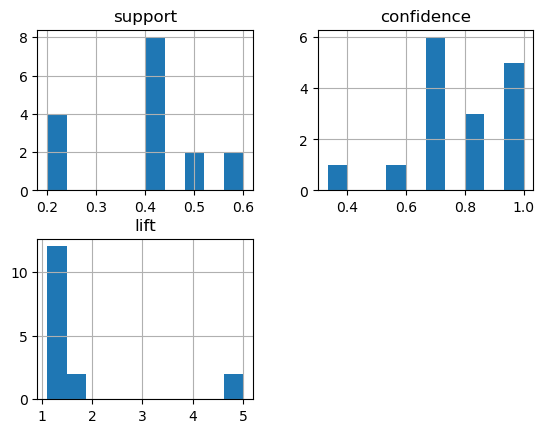

In [21]:
rule1[['support','confidence','lift']].hist()


<Axes: xlabel='support', ylabel='confidence'>

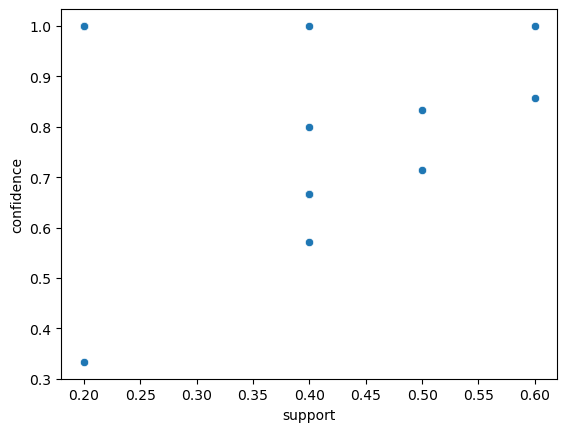

In [24]:
sns.scatterplot( x = 'support',y = 'confidence',data = rule1)


In [27]:
#### Association rule with 15% support and 90% confidence

In [26]:
ap1 = apriori(m2,min_support=0.15,use_colnames=True)
ap1

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
5,0.2,(LOTR2)
6,0.2,(Green Mile)
7,0.5,"(Gladiator, Sixth Sense)"
8,0.4,"(Patriot, Sixth Sense)"
9,0.2,"(Green Mile, Sixth Sense)"


In [29]:
rule2 = association_rules(ap1, metric ='lift' ,min_threshold = 0.9 )

In [31]:
rule2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4,0.533333
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8,0.400000
2,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.250000
3,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.250000
4,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf,0.500000
5,(Sixth Sense),(Green Mile),0.6,0.2,0.2,0.333333,1.666667,0.08,1.2,1.000000
6,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8,1.000000
7,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf,0.750000
8,(LOTR1),(LOTR2),0.2,0.2,0.2,1.000000,5.000000,0.16,inf,1.000000
9,(LOTR2),(LOTR1),0.2,0.2,0.2,1.000000,5.000000,0.16,inf,1.000000


In [45]:
rule2.sort_values('lift',ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
8,(LOTR1),(LOTR2),0.2,0.2,0.2,1.000000,5.000000,0.16,inf,1.000000
9,(LOTR2),(LOTR1),0.2,0.2,0.2,1.000000,5.000000,0.16,inf,1.000000
4,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf,0.500000
5,(Sixth Sense),(Green Mile),0.6,0.2,0.2,0.333333,1.666667,0.08,1.2,1.000000
6,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8,1.000000
7,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf,0.750000
12,"(Patriot, Sixth Sense)",(Gladiator),0.4,0.7,0.4,1.000000,1.428571,0.12,inf,0.500000
13,(Gladiator),"(Patriot, Sixth Sense)",0.7,0.4,0.4,0.571429,1.428571,0.12,1.4,1.000000
11,"(Gladiator, Sixth Sense)",(Patriot),0.5,0.6,0.4,0.800000,1.333333,0.10,2.0,0.500000
14,(Patriot),"(Gladiator, Sixth Sense)",0.6,0.5,0.4,0.666667,1.333333,0.10,1.5,0.625000


In [48]:
r = rule2[rule2.lift>1]
r

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4,0.533333
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8,0.400000
2,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.250000
3,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.250000
4,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf,0.500000
5,(Sixth Sense),(Green Mile),0.6,0.2,0.2,0.333333,1.666667,0.08,1.2,1.000000
6,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8,1.000000
7,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf,0.750000
8,(LOTR1),(LOTR2),0.2,0.2,0.2,1.000000,5.000000,0.16,inf,1.000000
9,(LOTR2),(LOTR1),0.2,0.2,0.2,1.000000,5.000000,0.16,inf,1.000000


array([[<Axes: title={'center': 'support'}>,
        <Axes: title={'center': 'confidence'}>],
       [<Axes: title={'center': 'lift'}>, <Axes: >]], dtype=object)

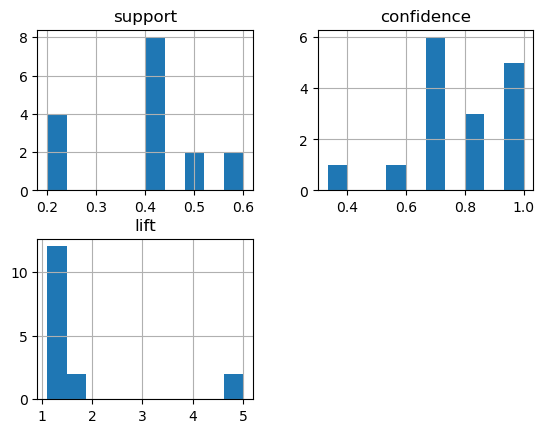

In [33]:
rule2[['support','confidence','lift']].hist()


<Axes: xlabel='support', ylabel='confidence'>

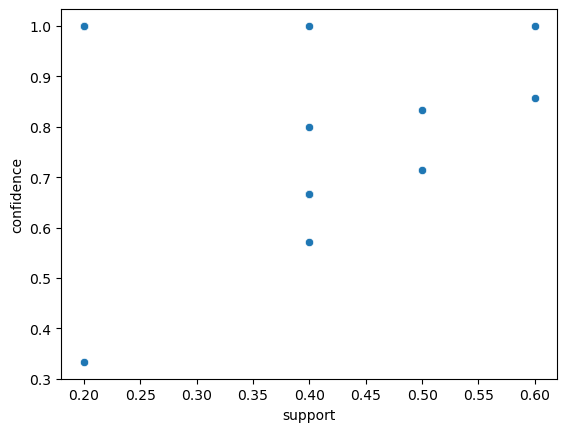

In [34]:
sns.scatterplot( x = 'support',y = 'confidence',data = rule2)



In [38]:
#### Association rule with 50% support and 80% confidence

In [39]:
ap3 = apriori(m2,min_support=0.50,use_colnames=True)
ap3

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.6,(Patriot)
3,0.5,"(Gladiator, Sixth Sense)"
4,0.6,"(Gladiator, Patriot)"


In [41]:
rule3 = association_rules(ap1, metric ='lift' ,min_threshold = 0.8)

In [42]:
rule3

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4,0.533333
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8,0.400000
2,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.250000
3,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.250000
4,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf,0.500000
5,(Sixth Sense),(Green Mile),0.6,0.2,0.2,0.333333,1.666667,0.08,1.2,1.000000
6,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8,1.000000
7,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf,0.750000
8,(LOTR1),(LOTR2),0.2,0.2,0.2,1.000000,5.000000,0.16,inf,1.000000
9,(LOTR2),(LOTR1),0.2,0.2,0.2,1.000000,5.000000,0.16,inf,1.000000


In [49]:
rule3.sort_values('lift',ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
8,(LOTR1),(LOTR2),0.2,0.2,0.2,1.000000,5.000000,0.16,inf,1.000000
9,(LOTR2),(LOTR1),0.2,0.2,0.2,1.000000,5.000000,0.16,inf,1.000000
4,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf,0.500000
5,(Sixth Sense),(Green Mile),0.6,0.2,0.2,0.333333,1.666667,0.08,1.2,1.000000
6,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8,1.000000
7,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf,0.750000
12,"(Patriot, Sixth Sense)",(Gladiator),0.4,0.7,0.4,1.000000,1.428571,0.12,inf,0.500000
13,(Gladiator),"(Patriot, Sixth Sense)",0.7,0.4,0.4,0.571429,1.428571,0.12,1.4,1.000000
11,"(Gladiator, Sixth Sense)",(Patriot),0.5,0.6,0.4,0.800000,1.333333,0.10,2.0,0.500000
14,(Patriot),"(Gladiator, Sixth Sense)",0.6,0.5,0.4,0.666667,1.333333,0.10,1.5,0.625000


In [50]:
r1 = rule3[rule3.lift>1]
r1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4,0.533333
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8,0.400000
2,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.250000
3,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.250000
4,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf,0.500000
5,(Sixth Sense),(Green Mile),0.6,0.2,0.2,0.333333,1.666667,0.08,1.2,1.000000
6,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8,1.000000
7,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf,0.750000
8,(LOTR1),(LOTR2),0.2,0.2,0.2,1.000000,5.000000,0.16,inf,1.000000
9,(LOTR2),(LOTR1),0.2,0.2,0.2,1.000000,5.000000,0.16,inf,1.000000


array([[<Axes: title={'center': 'support'}>,
        <Axes: title={'center': 'confidence'}>],
       [<Axes: title={'center': 'lift'}>, <Axes: >]], dtype=object)

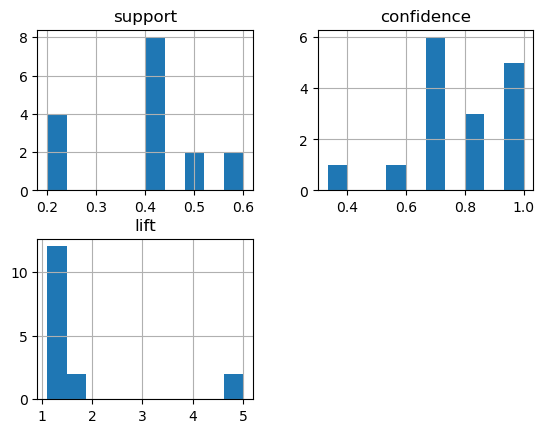

In [51]:
rule3[['support','confidence','lift']].hist()


<Axes: xlabel='support', ylabel='confidence'>

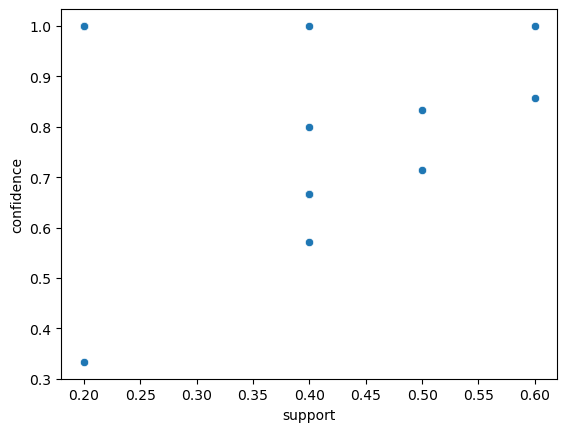

In [52]:
sns.scatterplot( x = 'support',y = 'confidence',data = rule3)
